In [1]:
import os
import sys
module_path = os.path.abspath('.')
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import hydra
import copy

import utils.io as io
from utils.rle import encode, decode
from grit_paths import GritPaths
import utils.vis as vis
from utils.vis import grit_viz, GritIO, GritIOType

In [3]:
with hydra.initialize_config_dir(config_dir=f'{module_path}/configs'):
    cfg = hydra.compose('default')

cfg.job_name = 'vis'
io.mkdir_if_not_exists(cfg.job_dir)

In [4]:
grit_pths = GritPaths(cfg.grit.base)

In [5]:
#samples = io.load_json_object(grit_pths.samples('localization','ablation'))

In [6]:
sample = io.load_json_object('data/seg_example.json')
display(sample)

{'input': {'example_id': 'coco_seg_test-reserve_toilet_71326',
  'image_id': 'coco/test2015/COCO_test2015_000000071326.jpg',
  'output_options': None,
  'task_bbox': None,
  'task_name': 'segmentation',
  'task_query': 'toilet'},
 'meta': {'concepts': [{'lemma': 'toilet', 'pos': 'NOUN', 'text': 'toilet'}],
  'data_source': 'coco_seg',
  'has_new_concept': False,
  'is_distorted': False,
  'is_new_source': False},
 'output': {'bboxes': None,
  'confidence': 1.0,
  'example_id': 'coco_seg_test-reserve_toilet_71326',
  'image_id': 'coco/test2015/COCO_test2015_000000071326.jpg',
  'masks': [{'counts': 'liU5h0n==I8G9H6L3M4L4M3L4L3N3L3M3N2M3M4L3L4M3L5K4`EcLY9`3XFQMb9S3ZFTM_9P3]FWM]9Y4L4M2O1O2N101N1O1O2N1O2N10O01O001O1O001O010O000000000001O000000000000001O000000000000000000000000O10000000000000000000000000000000O100O1O00100O1O1O100O1L4M3M5K5ROhFmK]9P4nFbKX9\\4h0M3N2M3M2O1N2O1N101N2N2O1N101N2N2O0O2N2N2N1O2M3N2N1O2N2N2N1O2M3M3L5K5L4K4L5L4K5K5L3L5K5J6J^_n1',
    'size': [480, 640]},
   {'counts'

In [7]:
masks = [decode(rle) for rle in sample['output']['masks']]

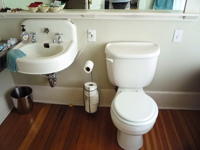

In [8]:
image_pth = os.path.join('/home/tanmayg/Data/grit_data/images',sample['input']['image_id'])
img = vis.read_image(image_pth)
vis.display_thumbnail(img,max_size=(200,200))

In [9]:
gt_boxes = sample['output']['bboxes']
pred_boxes = [[12,18,120,95]]

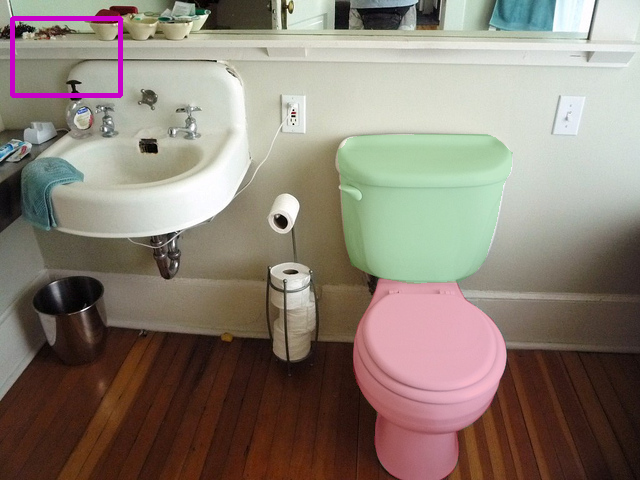

{'Query': 'toilet', 'GT': ['toilet', 'seat']}

In [10]:
img_,text = grit_viz(img, GritIO(text=sample['input']['task_query']), GritIOType.INPUT)
img_,text = grit_viz(img_, GritIO(boxes=gt_boxes,segs=masks,text=['toilet','seat']), GritIOType.GT, text)
img_,text = grit_viz(img_, GritIO(boxes=pred_boxes), GritIOType.PRED, text)
vis.display_image(img_)
display(text)

Updating GritIOType changes visualization behavior - eg. for changing mask/box colors

In [11]:
GritIOType.GT.seg_colors = [(255,0,0)]*100
GritIOType.PRED.seg_colors = [(0,255,0)]*100

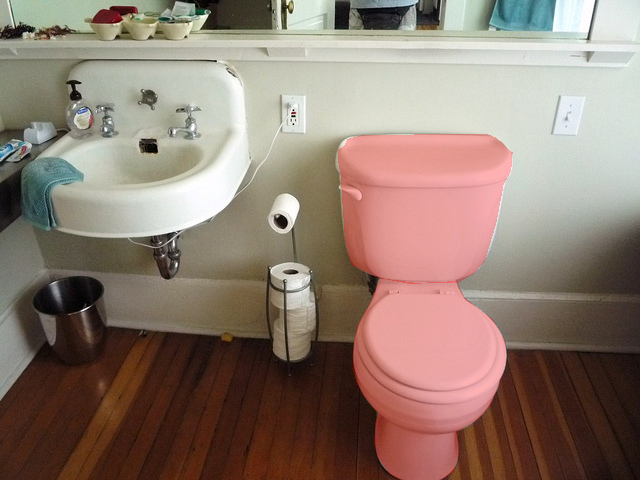

{}

In [12]:
img_,text = grit_viz(img, GritIO(segs=masks), GritIOType.GT)
vis.display_image(img_)
display(text)